# 站场说明

如下图所示，模拟生成数据共包含四个站场（4个泵站，其中1个为分输站）和3个阀室。

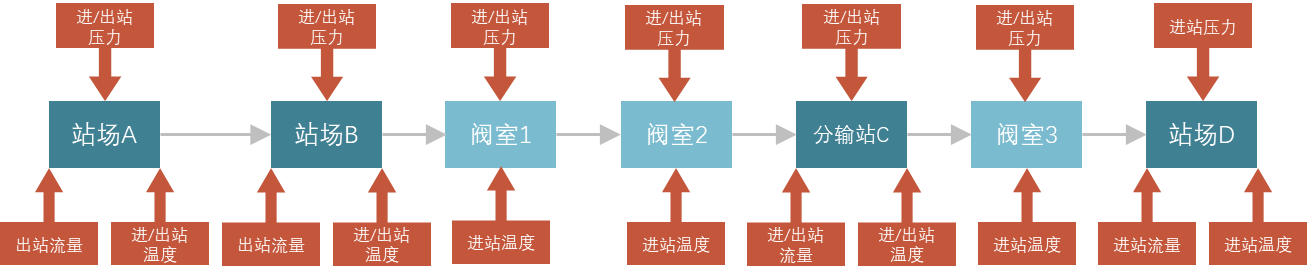



其中作为输入数据的有：

| 站 场 |  进站流量 | 出站流量 | 进站温度 | 出站温度 |
| :----:|  :----:  |  :----:  |  :----:  |  :----:  |
| 站场A | -------- | 出站流量 | 进站温度 | 出站温度 |  
| 站场B | -------- | 出站流量 | 进站温度 | 出站温度 |  
| 阀室1 | -------- | -------- | 进站温度 | -------- |  
| 阀室2 | -------- | -------- | 进站温度 | -------- |  
| 站场C | 进站流量 | 出站流量 | 进站温度 | 出站温度 |  
| 阀室3 | -------- | -------- | 进站温度 | -------- |  
| 站场D | 进站流量 | -------- | 进站温度 | -------- |  


作为输出数据的有：

| 站 场 |  进站压力 | 出站压力 |
| :----:|  :----:  |  :----:  |
| 站场A | 进站压力 | 出站压力 | 
| 站场B | 进站压力 | 出站压力 |  
| 阀室1 | 进站压力 | 出站压力 |  
| 阀室2 | 进站压力 | 出站压力 | 
| 站场C | 进站压力 | 出站压力 |  
| 阀室3 | 进站压力 | 出站压力 |
| 站场D | 进站压力 | -------- |

# 数据准备

In [1]:
#coding:utf-8
import os
import time
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from scipy import stats, linalg

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']   #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False     #用来正常显示符号

DATA_ROOT = "../DATA/"
xls_lists = os.listdir('../DATA/')

In [2]:
# 读取数据
df_data = pd.read_excel('../TMP/生成数据用于测试.xlsx')
df_describe = pd.read_excel('../TMP/正则化表格.xlsx', index_col='Unnamed: 0')

## 数据概览

In [3]:
df_data

,站场A 出站流量,站场B 出站流量,站场C 进站流量,站场C 出站流量,站场D 进站流量,站场A 进站温度,站场A 出站温度,站场B 进站温度,站场B 出站温度,阀室1 进站温度,...,阀室1 出站压力,阀室2 进站压力,阀室2 出站压力,站场C 进站压力,站场C 分输阀后压力,站场C 分输阀前压力,站场C 出站压力,阀室3 进站压力,阀室3 出站压力,站场D 进站压力
0,0.000000,0.000000,0.000000,0.000000,0.000000,22.824000,24.604,22.513,23.114000,20.534000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000000,0.000000,0.000000,0.000000,0.000000,23.031000,24.542,22.348,23.010000,20.535000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000000,0.000000,0.000000,0.000000,0.000000,22.451000,24.604,22.431,23.072000,20.533000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.000000,0.000000,0.000000,0.000000,0.000000,22.555000,24.625,22.451,23.072000,20.517000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.000000,0.000000,0.000000,0.000000,0.000000,22.099000,24.148,22.099,22.803000,20.538000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818,1146.765969,1096.362999,1072.798987,610.453004,605.012982,13.736000,15.531,15.304,14.973999,16.320001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1819,1146.831033,1109.141033,1084.870016,648.106982,645.227019,19.307000,21.561,20.692,20.526000,20.866999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1820,1147.794005,1133.797001,1125.385030,664.159974,655.359996,19.287000,21.313,20.671,20.340000,20.744000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1821,1180.667972,1133.797001,1064.194964,661.972987,656.000013,19.555001,21.334,21.727,22.099000,21.044000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_describe

,站场A 出站流量,站场B 出站流量,站场C 进站流量,站场C 出站流量,站场D 进站流量,站场A 进站温度,站场A 出站温度,站场B 进站温度,站场B 出站温度,阀室1 进站温度,...,阀室1 出站压力,阀室2 进站压力,阀室2 出站压力,站场C 进站压力,站场C 分输阀后压力,站场C 分输阀前压力,站场C 出站压力,阀室3 进站压力,阀室3 出站压力,站场D 进站压力
min,-5.381,-1.657,-4.161,0.000,0.00,5.928,5.435,7.204,0.000,-12.485,...,-0.078,-0.072,-0.081,0.182,-0.022,0.006,0.947,0.643,0.648,-0.034
max,1192.868,1157.297,1414.193,982.187,1103.68,26.694,27.212,24.066,23.755,21.136,...,0.874,0.888,0.868,1.316,0.283,1.300,4.764,4.013,4.026,1.192


## 数值归一化

In [5]:
# 创建标签行

TRAIN_FEATURE_LIST = ['站场A 出站流量',
                     '站场B 出站流量',
                     '站场C 进站流量',
                     '站场C 出站流量',
                     '站场D 进站流量',

                     '站场A 进站温度',
                     '站场A 出站温度',
                     '站场B 进站温度',
                     '站场B 出站温度',
                     '阀室1 进站温度',
                     '阀室2 进站温度',
                     '站场C 进站温度',
                     '站场C 出站温度',
                     '阀室3 进站温度',
                     '站场D 进站温度']

LABEL_FEATURE_LIST = ['站场A 进站压力',
                      '站场A 出站压力',
                      '站场B 进站压力',
                      '站场B 出站压力',

                      '阀室1 进站压力',
                      '阀室1 出站压力',

                      '阀室2 进站压力',
                      '阀室2 出站压力',

                      '站场C 进站压力',
                      '站场C 分输阀后压力',

                      '站场C 分输阀前压力',
                      '站场C 出站压力',

                      '阀室3 进站压力',
                      '阀室3 出站压力',

                      '站场D 进站压力']

ALL_FEATURE_LIST = TRAIN_FEATURE_LIST + LABEL_FEATURE_LIST

In [6]:
# 归一化输入值
df_data_input = (df_data[TRAIN_FEATURE_LIST] - df_describe[TRAIN_FEATURE_LIST].min()) / (df_describe[TRAIN_FEATURE_LIST].max() - df_describe[TRAIN_FEATURE_LIST].min())

# 模型准备

In [7]:
import torch
from torch import nn


""" 判别器模型
class Discriminator(torch.nn.Module):
    
    def __init__(self):
        super(Discriminator,self).__init__()
        self.conv = torch.nn.Sequential( nn.Linear(30, 15),
                                         nn.BatchNorm1d(num_features=15, momentum=0.8),
                                         nn.LeakyReLU(0.2, inplace=True),
                                         nn.Linear(15, 10),
                                         nn.BatchNorm1d(num_features=10, momentum=0.8),
                                         nn.LeakyReLU(0.2, inplace=True),
                                         nn.Linear(10, 1),
                                         nn.Sigmoid(),
                                        )
        
    def forward(self, input):
        output = self.conv(input)
        return output
"""

"""生成器模型"""
class Generator(torch.nn.Module):

    def __init__(self):
        super(Generator,self).__init__()
        self.encoder  =  nn.Sequential(  nn.Linear(15, 10),
                                         nn.BatchNorm1d(num_features=10, momentum=0.8),
                                         nn.Tanh(),
                                         nn.Linear(10, 7),
                                         nn.BatchNorm1d(num_features=7, momentum=0.8),
                                         nn.Tanh() 
                                      )

        self.decoder = nn.Sequential( nn.Linear(7, 10),
                                      nn.BatchNorm1d(num_features=10, momentum=0.8),
                                      nn.Tanh(),
                                      nn.Linear(10, 15),
                                      nn.Tanh()
                                    )
        
    def forward(self, input):
        encoded = self.encoder(input)
        decoded = self.decoder(encoded)
        return decoded
    
def initialize_weights(m):
    """ 初始化模型参数 """
    if isinstance(m,torch.nn.Linear):
        torch.nn.init.xavier_uniform_(m.weight.data)

        
# 创建模型
# model_discriminator = Discriminator()
# model_discriminator.apply(initialize_weights)

model_generator = Generator()
# model_generator.apply(initialize_weights)
model_generator.load_state_dict(torch.load( '../MODEL/20210629_014232/gen_best_model0.2761.pth' ))

<All keys matched successfully>

# 生成数据并保存

In [9]:
# 生成数据并保存
input_data = torch.tensor(df_data_input.values).to(torch.float32)
X_gen = model_generator(input_data)

df_output = pd.concat([pd.DataFrame(input_data.data, columns=TRAIN_FEATURE_LIST), 
                       pd.DataFrame(X_gen.data, columns=LABEL_FEATURE_LIST)], axis=1)

df_output = (df_output * \
             (df_describe.loc['max', df_output.columns] - df_describe.loc['min', df_output.columns]) +\
             df_describe.loc['min', df_output.columns])  


df_output = pd.DataFrame(np.array(df_output.values, dtype=float), columns=df_output.columns)
df_output.to_excel('../TMP/输出流量压力分布结果.xlsx')
print("流量->压力 预测结果完成！")

流量->压力 预测结果完成！


In [10]:
df_output

,站场A 出站流量,站场B 出站流量,站场C 进站流量,站场C 出站流量,站场D 进站流量,站场A 进站温度,站场A 出站温度,站场B 进站温度,站场B 出站温度,阀室1 进站温度,...,阀室1 出站压力,阀室2 进站压力,阀室2 出站压力,站场C 进站压力,站场C 分输阀后压力,站场C 分输阀前压力,站场C 出站压力,阀室3 进站压力,阀室3 出站压力,站场D 进站压力
0,0.000000,1.192093e-07,0.000000,0.000000,0.000000,22.823999,24.604000,22.513000,23.113998,20.533997,...,-0.042620,0.236186,-0.038730,0.401131,0.092696,0.431154,2.328940,1.103408,2.183777,0.543703
1,0.000000,1.192093e-07,0.000000,0.000000,0.000000,23.031000,24.542000,22.348000,23.009998,20.534996,...,-0.045314,0.232101,-0.042662,0.400391,0.092548,0.428977,2.320359,1.093261,2.178190,0.548255
2,0.000000,1.192093e-07,0.000000,0.000000,0.000000,22.451000,24.604000,22.431000,23.071999,20.532997,...,-0.045381,0.234612,-0.041979,0.401307,0.092244,0.428681,2.318761,1.089778,2.177254,0.547353
3,0.000000,1.192093e-07,0.000000,0.000000,0.000000,22.555000,24.625000,22.450998,23.071999,20.516998,...,-0.044744,0.234378,-0.041402,0.400995,0.092400,0.429277,2.321421,1.093689,2.178968,0.546673
4,0.000000,1.192093e-07,0.000000,0.000000,0.000000,22.099001,24.147999,22.098999,22.802999,20.537998,...,-0.050243,0.232366,-0.046653,0.402632,0.091722,0.425317,2.303955,1.066302,2.167371,0.554406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818,1146.765991,1.096363e+03,1072.798950,610.453003,605.013000,13.736000,15.531000,15.304001,14.973999,16.320000,...,0.293981,0.343106,0.064774,0.476634,0.166811,0.634768,3.057312,1.745372,2.697856,0.517839
1819,1146.831055,1.109141e+03,1084.869995,648.106995,645.227051,19.307001,21.561001,20.691999,20.525999,20.866997,...,0.249270,0.411780,0.149825,0.457030,0.147168,0.642912,2.882309,2.296963,2.526278,0.197493
1820,1147.794067,1.133797e+03,1125.385010,664.159973,655.360046,19.287001,21.313000,20.671000,20.340000,20.743999,...,0.262368,0.406529,0.149034,0.441186,0.149355,0.644769,2.901640,2.325841,2.545991,0.183506
1821,1180.667969,1.133797e+03,1064.194946,661.973022,656.000061,19.555000,21.334002,21.726999,22.098999,21.043999,...,0.290153,0.489305,0.147842,0.492628,0.145845,0.646328,2.860752,2.370008,2.539484,0.179066
